In [4]:
import pandas as pd
#%pip install openpyxl




In [5]:
df = pd.read_excel('Rawdata.xlsx')
df.head()

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year


In [6]:
df['Name'] = df['Name'].str.replace(r'\W', '', regex = True)

In [7]:
df['Age'] = df['Age'].str.extract('(\\d+)')

df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34,Mumbai,5^00#0,2+
1,Teddy,Testing,45,Bangalore,10%%000,<3
2,Umar,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam,Statistics,67,NaN,30000-,5+ year
5,Kim,NLP,55,Delhi,6000^$0,10+


In [8]:
df['Location'] = df['Location'].str.replace(r'\W', '', regex = True)
df['Salary'] = df['Salary'].str.replace(r'\W', '', regex = True)
df['Domain'] = df['Domain'].str.replace(r'\W', '', regex = True)
df['Exp'] = df['Exp'].str.extract('(\\d+)')

df


,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [9]:
cleaned_data = df.copy()
cleaned_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [10]:
#EDA TECHNIQ
cleaned_data


,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [11]:
cleaned_data.isnull().sum()


Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

In [12]:
cleaned_data['Age']


0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: str

In [13]:
import numpy as np
cleaned_data['Age'] = cleaned_data['Age'].fillna(np.mean(pd.to_numeric(cleaned_data['Age']
)))
cleaned_data['Age'] = cleaned_data['Age'].astype(int)



cleaned_data['Exp'] = cleaned_data['Exp'].fillna(np.mean(pd.to_numeric(cleaned_data['Exp']
)))




cleaned_data['Location'] = cleaned_data['Location'].fillna(cleaned_data['Location'].mode()[0])

cleaned_data['Location'] = cleaned_data['Location'].astype('category')


cleaned_data




,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4.8
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [14]:
cleaned_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      str     
 1   Domain    6 non-null      str     
 2   Age       6 non-null      int64   
 3   Location  6 non-null      category
 4   Salary    6 non-null      str     
 5   Exp       6 non-null      object  
dtypes: category(1), int64(1), object(1), str(3)
memory usage: 410.0+ bytes


In [15]:
cleaned_data['Domain'] = cleaned_data['Domain'].astype('category')
cleaned_data['Name'] = cleaned_data['Name'].astype('category')
cleaned_data['Location'] = cleaned_data['Location'].astype('category')
cleaned_data['Salary'] = cleaned_data['Salary'].astype(int)
cleaned_data['Age'] = cleaned_data['Age'].astype(int)
cleaned_data['Exp'] = cleaned_data['Exp'].astype(int)

cleaned_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [16]:
cleaned_data.to_csv('clean_data.csv')
import os

os.getcwd()


'/Users/dineshbosegandhi/Documents/GitHub/datascience/practice'

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [18]:
cleaned_data['Salary']

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: int64

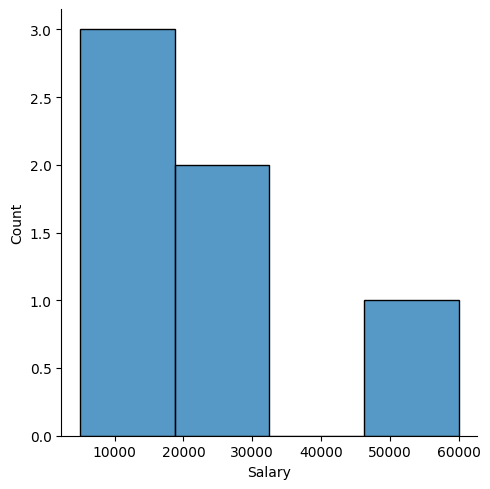

In [24]:
vis1 = sns.displot(cleaned_data['Salary'])

plt.show(vis1)

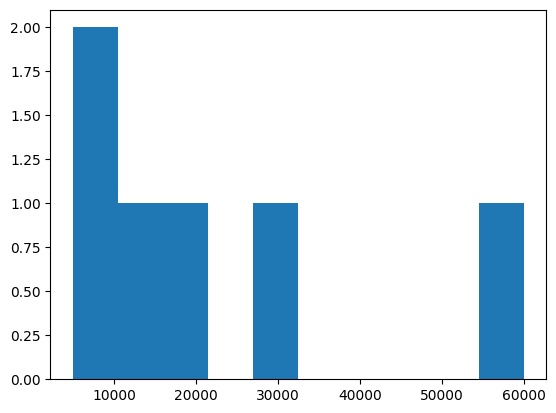

In [20]:
vis2 = plt.hist(cleaned_data['Salary'])

In [23]:
import seaborn as sns
bar_plt=sns.distplot(data=cleaned_data,x=cleaned_data['Salary'],y=cleaned_data['Salary'])
plt.show(bar_plt)


TypeError: distplot() got an unexpected keyword argument 'data'

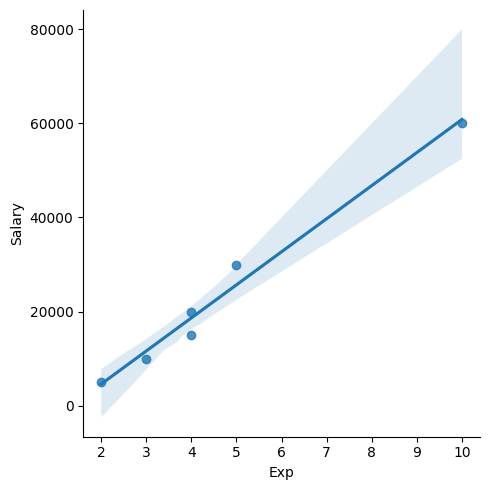

In [ ]:
sns.lmplot(data=cleaned_data,x='Exp',y='Salary')

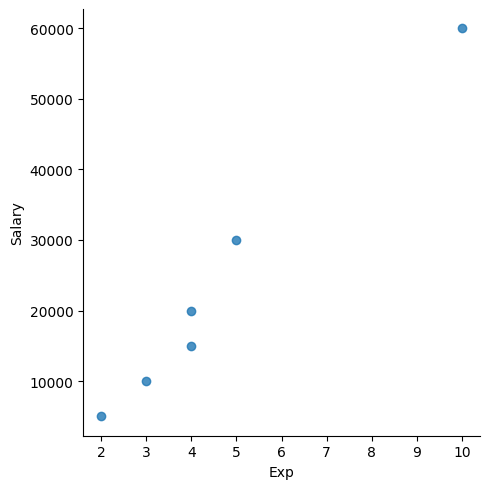

In [ ]:
sns.lmplot(data=cleaned_data,x='Exp',y='Salary',fit_reg=False)

In [ ]:
cleaned_data[0:6:2]

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
2,Umar,Dataanalyst,50,Bangalore,15000,4
4,Uttam,Statistics,67,Bangalore,30000,5


In [ ]:
cleaned_data.columns

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='str')

In [ ]:
X_iv = cleaned_data[['Name', 'Domain', 'Age', 'Location', 'Exp']]

In [ ]:
X_iv

,Name,Domain,Age,Location,Exp
0,Mike,Datascience,34,Mumbai,2
1,Teddy,Testing,45,Bangalore,3
2,Umar,Dataanalyst,50,Bangalore,4
3,Jane,Analytics,50,Hyderbad,4
4,Uttam,Statistics,67,Bangalore,5
5,Kim,NLP,55,Delhi,10


In [ ]:
Y_dv = cleaned_data[['Salary']]

In [ ]:
Y_dv

,Salary
0,5000
1,10000
2,15000
3,20000
4,30000
5,60000


In [ ]:
#download and install OLLAMA
imputation = pd.get_dummies(cleaned_data,dtype=int)
imputation


,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,45,10000,3,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,50,15000,4,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,50,20000,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,67,30000,5,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
5,55,60000,10,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
imputation.columns

Index(['Age', 'Salary', 'Exp', 'Name_Jane', 'Name_Kim', 'Name_Mike',
       'Name_Teddy', 'Name_Umar', 'Name_Uttam', 'Domain_Analytics',
       'Domain_Dataanalyst', 'Domain_Datascience', 'Domain_NLP',
       'Domain_Statistics', 'Domain_Testing', 'Location_Bangalore',
       'Location_Delhi', 'Location_Hyderbad', 'Location_Mumbai'],
      dtype='str')

In [ ]:
#data analytics projct with olama 
#gradio

#%pip install gradio

%pip install ollama




Python(32386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import gradio as gr
import ollama

def chat_with_gemma(message, history):
    # Call the local Gemma 3 model
    # The 'stream=True' setting makes the text appear as it is generated
    response = ollama.chat(
        model='gemma3:4b', 
        messages=[{'role': 'user', 'content': message}],
        stream=True
    )
    
    partial_message = ""
    for chunk in response:
        print("chunk['message']--",chunk['message'])

        partial_message += chunk['message']['content']
        yield partial_message

# Create the Gradio interface
demo = gr.ChatInterface(
    fn=chat_with_gemma, 
    title="Gemma 3 Chatbot",
    description="Running locally via Ollama on macOS"
)

if __name__ == "__main__":
    demo.launch()


* Running on local URL:  http://127.0.0.1:7864
* To create a public link, set `share=True` in `launch()`.


In [ ]:
for i in range(3,8):
    pass
    print(i)

    

3
4
5
6
7


In [ ]:
num = [1,2,3,4,5]
num1 = [4,5,6,7,8]
for n1,n2 in zip(num,num1):
    print(f"n1-{n1}, n2-{n2}")

n1-1, n2-4
n1-2, n2-5
n1-3, n2-6
n1-4, n2-7
n1-5, n2-8
